In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('World population growth rate by cities 2024.csv')

In [4]:
df.head()

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               801 non-null    object 
 1   Country            801 non-null    object 
 2   Continent          790 non-null    object 
 3   Population (2024)  801 non-null    int64  
 4   Population (2023)  801 non-null    int64  
 5   Growth Rate        801 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.7+ KB


In [6]:
df.describe()

,Population (2024),Population (2023),Growth Rate
count,8.010000e+02,8.010000e+02,801.000000
mean,2.654327e+06,2.604461e+06,0.020051
std,3.723253e+06,3.661201e+06,0.012180
min,7.500360e+05,7.228360e+05,-0.024900
25%,9.909310e+05,9.698040e+05,0.012200
50%,1.379368e+06,1.363510e+06,0.019700
75%,2.570980e+06,2.514077e+06,0.026600
max,3.711504e+07,3.719410e+07,0.058200


In [13]:
df.isna().sum()


City                 0
Country              0
Continent            0
Population (2024)    0
Population (2023)    0
Growth Rate          0
dtype: int64

In [12]:
df = df.dropna()

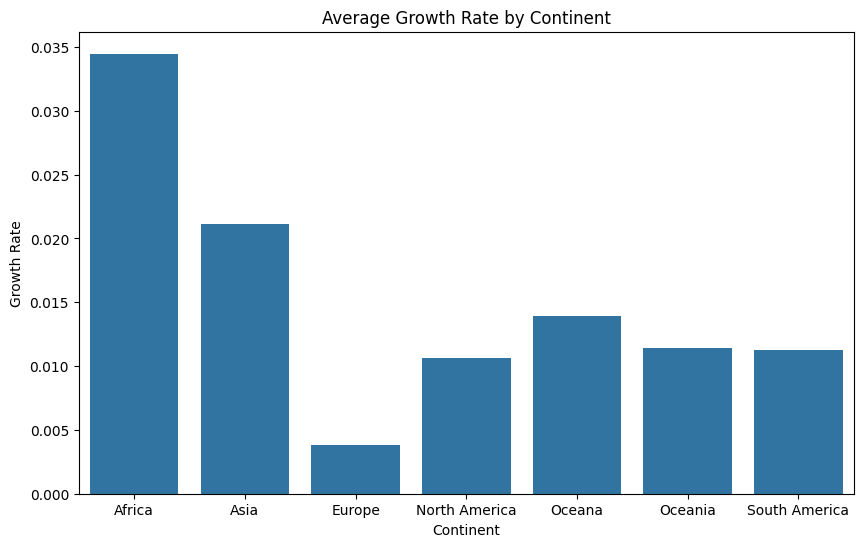

In [16]:
continent_summary = df.groupby('Continent').agg({
    'Population (2024)': 'sum',
    'Population (2023)': 'sum',
    'Growth Rate': 'mean'
}).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=continent_summary, x='Continent', y='Growth Rate')
plt.title('Average Growth Rate by Continent')
plt.show()

          Country  Population (2024)  Population (2023)  Growth Rate
16        Burundi            1277050            1206767     0.058200
116        Uganda            4050826            3846102     0.053200
15   Burkina Faso            1185053            1128646     0.050000
11          Benin            1314916            1252890     0.049500
110      Tanzania           10375095            9886629     0.048567
26       DR Congo           30289277           28989304     0.046944
63     Madagascar            4048666            3872264     0.045600
32       Ethiopia            5703628            5460591     0.044500
100       Somalia            4696977            4497810     0.044133
2          Angola           14018657           13475912     0.042800


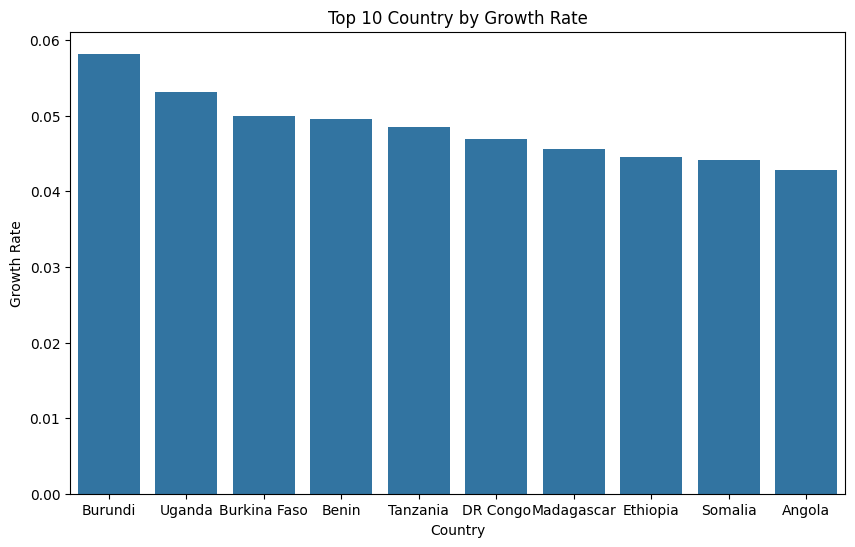

In [19]:
country = df.groupby('Country').agg({
    'Population (2024)': 'sum',
    'Population (2023)': 'sum',
    'Growth Rate': 'mean'
}).reset_index()

top_10_country = country.sort_values(by='Growth Rate', ascending=False).head(10)
print(top_10_country)



plt.figure(figsize=(10,6))
sns.barplot(data=top_10_country, x='Country', y='Growth Rate')
plt.title('Top 10 Country by Growth Rate')
plt.show()

           Country  Population (2024)  Population (2023)  Growth Rate
60         Lebanon            2402485            2421354    -0.007800
92         Romania            1767520            1776385    -0.005000
117        Ukraine            7265777            7274859    -0.002360
54           Japan           81914156           82078367    -0.001733
90     Puerto Rico            2436620            2439564    -0.001200
120  United States           31322184           31561393    -0.000888
14        Bulgaria            1287540            1288114    -0.000400
39          Greece            3969571            3968987     0.000300
88          Poland            2568847            2566933     0.000550
45         Hungary            1780391            1778052     0.001300


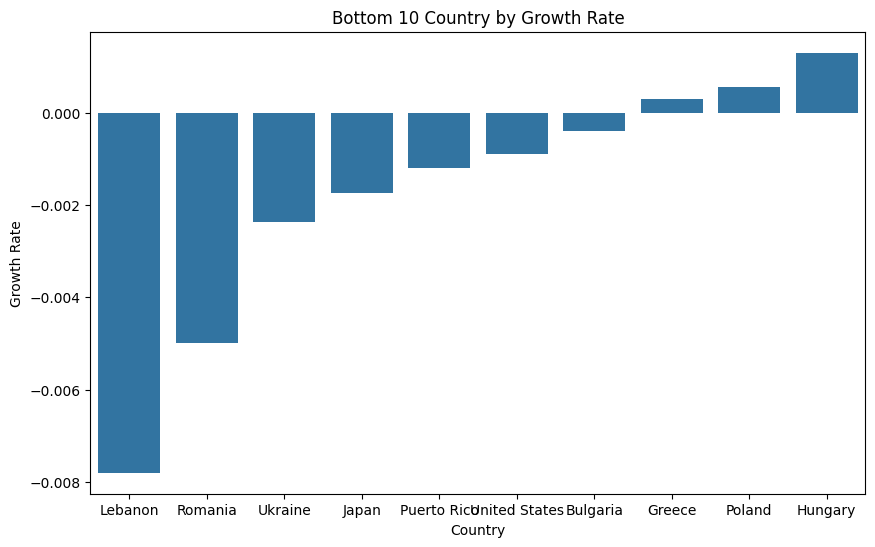

In [21]:
bottom_10_country = country.sort_values(by='Growth Rate', ascending=True).head(10)
print(bottom_10_country)



plt.figure(figsize=(10,6))
sns.barplot(data=bottom_10_country, x='Country', y='Growth Rate')
plt.title('Bottom 10 Country by Growth Rate')
plt.show()

          City  Population (2024)  Population (2023)  Growth Rate
114  Bujumbura            1277050            1206767       0.0582
403     Lokoja             885882             839046       0.0558
116      Bunia             856339             812090       0.0545
338    Kampala            4050826            3846102       0.0532
19      Aleppo            2317650            2203025       0.0520
476     Mwanza            1378014            1310754       0.0513
238       Goma             781875             744247       0.0506
686   Tshikapa            1131226            1077108       0.0502
425    Malanje             822471             783243       0.0501
296        Ibb             810149             771514       0.0501


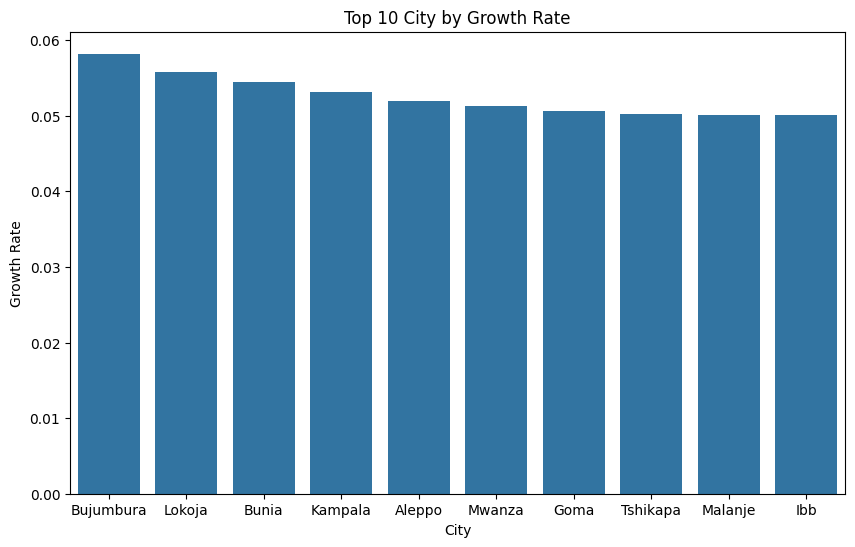

In [27]:
city = df.groupby('City').agg({
    'Population (2024)': 'sum',
    'Population (2023)': 'sum',
    'Growth Rate': 'mean'
}).reset_index()


top_10_city = city.sort_values(by='Growth Rate', ascending=False).head(10)
print(top_10_city)



plt.figure(figsize=(10,6))
sns.barplot(data=top_10_city, x='City', y='Growth Rate')
plt.title('Top 10 City by Growth Rate')
plt.show()

                       City  Population (2024)  Population (2023)  Growth Rate
498                New York            7931147            8133522     -0.02490
151                 Chicago            2590002            2627520     -0.01430
532            Philadelphia            1533916            1550587     -0.01070
407             Los Angeles            3748640            3785439     -0.00970
77                   Beirut            2402485            2421354     -0.00780
199                 Donetsk             882209             887716     -0.00620
198                  Dnipro             936766             941586     -0.00510
110               Bucharest            1767520            1776385     -0.00500
300  Indianapolis (balance)             874089             877355     -0.00370
589                San Jose            2415096            2413923     -0.00315


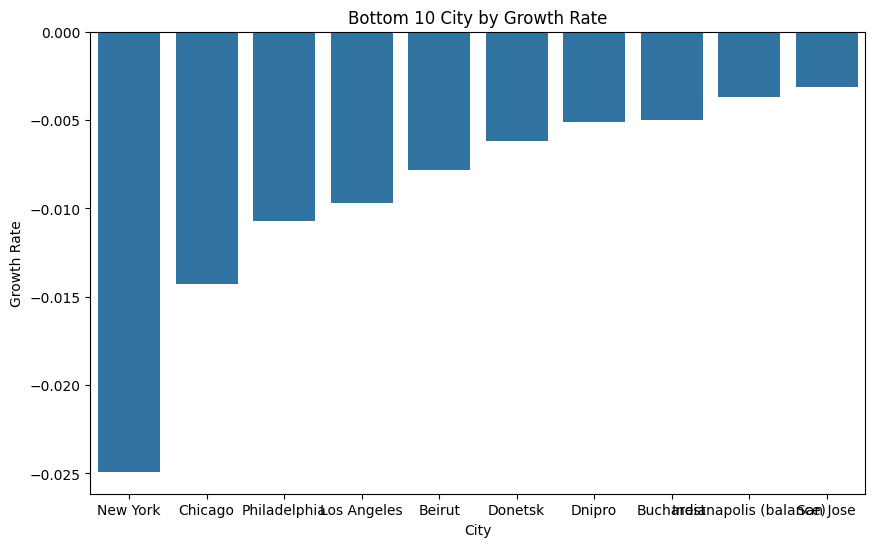

In [28]:
bottom_10_city = city.sort_values(by='Growth Rate', ascending=True).head(10)
print(bottom_10_city)



plt.figure(figsize=(10,6))
sns.barplot(data=bottom_10_city, x='City', y='Growth Rate')
plt.title('Bottom 10 City by Growth Rate')
plt.show()

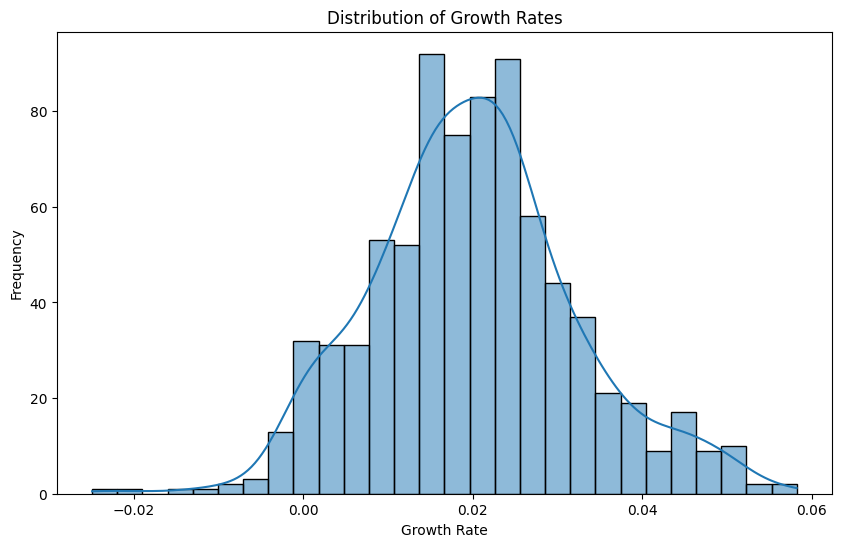

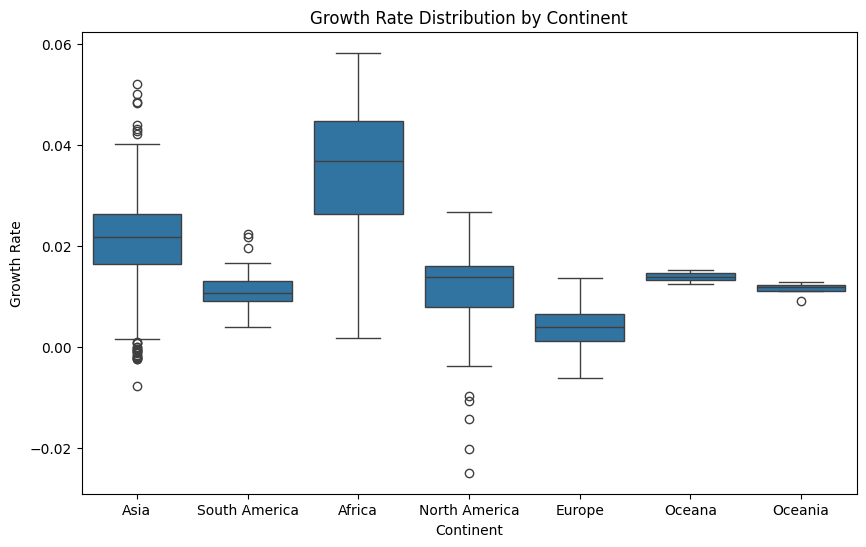

In [29]:
# Analyze the distribution of growth rates
plt.figure(figsize=(10, 6))
sns.histplot(df['Growth Rate'], kde=True)
plt.title('Distribution of Growth Rates')
plt.xlabel('Growth Rate')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of growth rates by continent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Continent', y='Growth Rate')
plt.title('Growth Rate Distribution by Continent')
plt.show()

                   Population (2024)  Population (2023)  Growth Rate
Population (2024)           1.000000           0.999896    -0.047556
Population (2023)           0.999896           1.000000    -0.055769
Growth Rate                -0.047556          -0.055769     1.000000


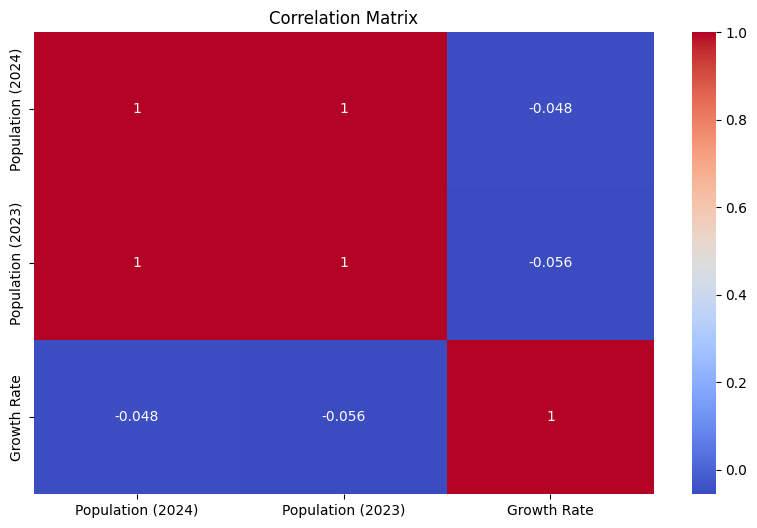

In [31]:
# Calculate the correlation matrix
correlation_matrix = df[['Population (2024)', 'Population (2023)', 'Growth Rate']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()